# Import

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import missingno as msno
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import matplotlib
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import shap
from sklearn.model_selection import train_test_split

import plotly.express as px 

In [2]:
# init shap
shap.initjs()

In [3]:
# change matplotlib style
plt.style.use('fivethirtyeight')

# set global font-size
matplotlib.rcParams.update({'font.size': 14})

# set font-scale for seaborn chart
sns.set(font_scale=1.5)

# change seaborn plot style
sns.set_style("whitegrid")

In [4]:
# read csv file
used_car_df = pd.read_csv('/Users/zhaoyudong/Downloads/vehicles.csv')

# Dataset Shape & Data Cleaning

In [5]:
used_car_df.shape

(426880, 26)

In [6]:
used_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
# check null value
used_car_df.isnull().sum(axis = 0)

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [8]:
# head 5 row
used_car_df.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  

[5 rows x 26 columns]

In [9]:
# backup dataset
used_car_df1 = used_car_df.copy()

In [10]:
# drop unralted columns
used_car_df = used_car_df.loc[:, ['price','year','manufacturer','condition','cylinders','fuel',
                                           'odometer','transmission','drive','size','type','paint_color','state']]

<AxesSubplot:>

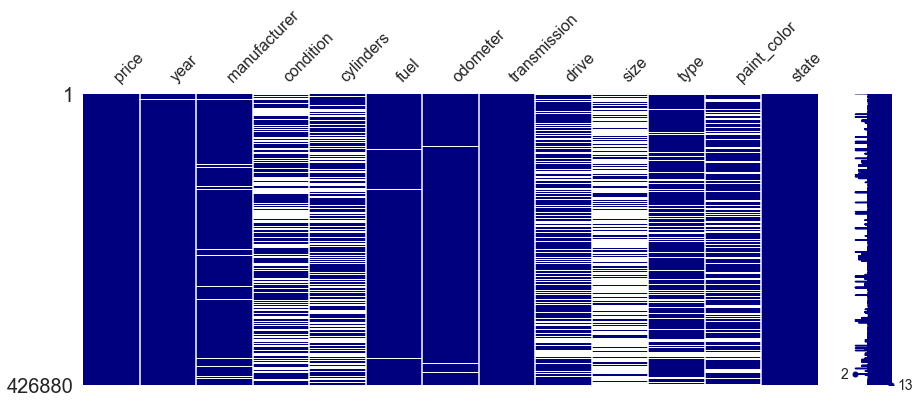

In [11]:
# show matrix plot of different fields, check null values percentage
msno.matrix(used_car_df, figsize=(13, 5), color=(0,0,0.5))

In [12]:
# drop null values
used_car_df = used_car_df.dropna(subset=['price','year','condition','manufacturer',
                           'cylinders','fuel','odometer','transmission',
                           'drive','paint_color','type','size'], how='any')

In [13]:
used_car_df.shape

(80170, 13)

In [14]:
used_car_df.head()

price    year manufacturer  condition    cylinders    fuel  odometer  \
31  15000  2013.0         ford  excellent  6 cylinders     gas  128000.0   
55  19900  2004.0         ford       good  8 cylinders  diesel   88000.0   
59  14000  2012.0        honda  excellent  6 cylinders     gas   95000.0   
65  22500  2001.0         ford       good  8 cylinders  diesel  144700.0   
73  15000  2017.0        dodge  excellent  8 cylinders     gas   90000.0   

   transmission drive       size      type paint_color state  
31    automatic   rwd  full-size     truck       black    al  
55    automatic   4wd  full-size    pickup        blue    al  
59    automatic   fwd  full-size  mini-van      silver    al  
65       manual   rwd  full-size     truck       white    al  
73    automatic   rwd   mid-size     sedan        grey    al

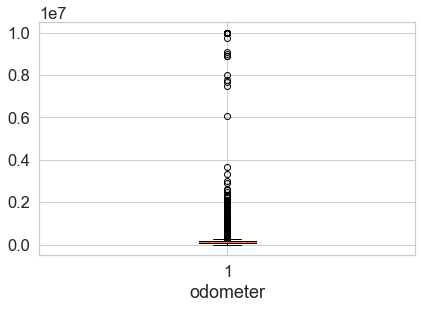

In [15]:
plt.boxplot(used_car_df.odometer)
plt.xlabel('odometer')
plt.show()

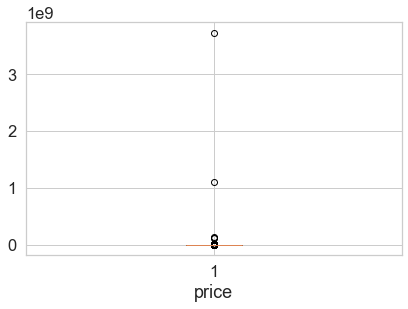

In [16]:
plt.boxplot(used_car_df.price)
plt.xlabel('price')
plt.show()

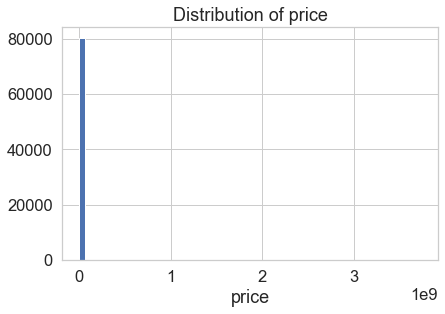

In [17]:
plt.hist(used_car_df['price'],bins=60)
plt.xlabel('price')
plt.title('Distribution of price')
plt.show()

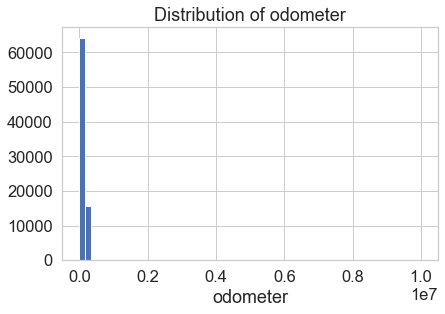

In [18]:
plt.hist(used_car_df['odometer'],bins=60)
plt.xlabel('odometer')
plt.title('Distribution of odometer')
plt.show()

In [19]:
cols = ['price', 'odometer']

In [20]:
used_car_df[cols].describe()

price      odometer
count  8.017000e+04  8.017000e+04
mean   7.953919e+04  1.248147e+05
std    1.379153e+07  2.494849e+05
min    0.000000e+00  0.000000e+00
25%    4.950000e+03  7.300000e+04
50%    9.000000e+03  1.140000e+05
75%    1.750000e+04  1.554675e+05
max    3.736929e+09  1.000000e+07

In [21]:
# trim outlier
upper_limit = used_car_df[cols].quantile(0.99)
lower_limit = used_car_df[cols].quantile(0.01)

In [22]:
used_car_df_trimed = used_car_df[~(((used_car_df[cols] <= lower_limit)
                            |(used_car_df[cols] >= upper_limit)).any(axis=1))]

In [23]:
used_car_df_trimed.shape

(74476, 13)

# Discriptive Stat

In [24]:
### define a group of tools

def draw_multiple_price_boxplots(df, group_field, title='', xlabel='', filter_labels=[], orient="v"):

    if len(filter_labels) != 0: 
        df = df[df[group_field].isin(filter_labels)]
    size = (8, 8)
    if len(df[group_field].unique()) >= 8:
        size = (12, 8) if orient != 'h' else (8, 12)
    fig,ax = plt.subplots(figsize=size)
    x,y = group_field, "price"
    if orient == 'h':
        x,y = y,x
    sns.boxplot(x=x, y=y, data=df, showfliers=False, ax=ax, orient=orient)
    ax.set(
        axisbelow=True,  # Hide the grid behind plot objects
        title=title
    )
    

def _draw_bar_plot(df, field, title='', xlabel='', ylabel=''):
    fig, ax = plt.subplots(figsize=(12,10))
    ax.bar(df[field], df['price'], width=1, edgecolor="white", linewidth=0.7)
    ax.set(
        title=title,
        xlabel=xlabel,
        ylabel=ylabel
    )
    plt.show()
    
def draw_bar_plot(df, group_field, title='', xlabel='', ylabel=''):
    grouped = df.groupby([group_field]).count()
    grouped = grouped.reset_index()
    _draw_bar_plot(grouped, group_field, title, xlabel, ylabel)

def draw_head_bar_plot(df, group_field, head=10, title='', xlabel='', ylabel=''):
    grouped = df.groupby([group_field]).count()
    grouped = grouped.reset_index()
    grouped = grouped.head(head)
    _draw_bar_plot(grouped, group_field, title, xlabel, ylabel)
    
def draw_pie_plot(df, group_field, title=''):
    grouped = df[group_field].value_counts()/len(df) * 100
    fig, ax = plt.subplots(figsize=(10,10))
    ax.pie(grouped)
    labels = [f'{l}, {s:0.1f}%' for l, s in zip(grouped.index, grouped)]
    plt.legend(bbox_to_anchor=(1,0.5), loc="center right", labels=labels,
               bbox_transform=plt.gcf().transFigure)
    plt.savefig("output.png", bbox_inches="tight")
    plt.subplots_adjust(left=0.0, bottom=0.2, right=0.9)
    plt.title(title)
    plt.show()

def draw_line_plot(x, y):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(x, y, linewidth=2.0)
    plt.show()

# Price

[Text(0.5, 1.0, 'Frequency Distribution of Price')]

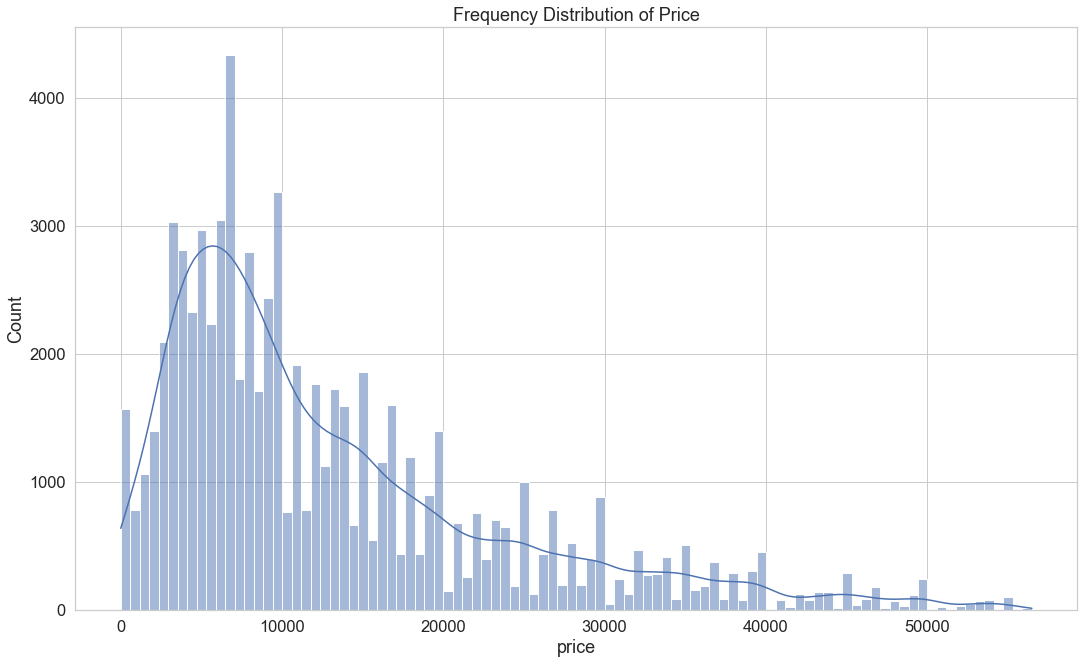

In [25]:
# price hist
fig,ax = plt.subplots(figsize=(16,10))
sns.histplot(data=used_car_df_trimed, x="price", kde=True, ax=ax)
ax.set(title='Frequency Distribution of Price')

# Year

[Text(0.5, 1.0, 'Frequency Distribution of Year')]

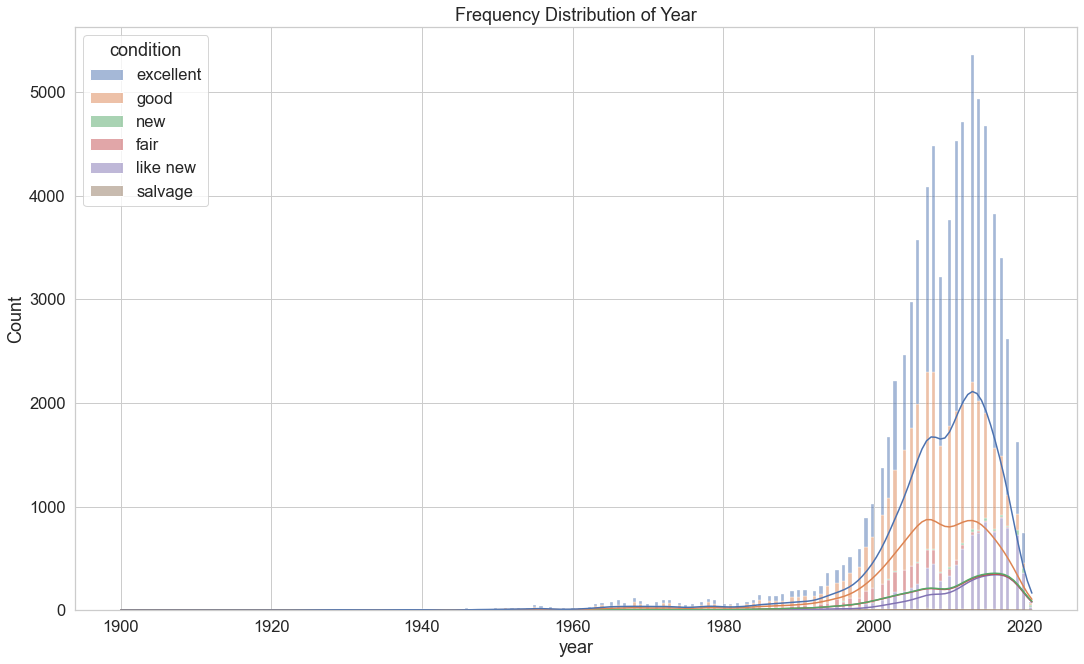

In [26]:
# year and confition
fig,ax = plt.subplots(figsize=(16,10))
sns.histplot(data=used_car_df_trimed,
             x="year", hue="condition",kde=True,  multiple="stack", ax=ax)
ax.set(title='Frequency Distribution of Year')

In [27]:
grouped_by_year_df = used_car_df_trimed.groupby(['year'])
grouped_by_year_df.price.describe()

count          mean           std      min      25%      50%  \
year                                                                    
1900.0     1.0  38250.000000           NaN  38250.0  38250.0  38250.0   
1905.0     1.0   3990.000000           NaN   3990.0   3990.0   3990.0   
1916.0     1.0  12000.000000           NaN  12000.0  12000.0  12000.0   
1918.0     1.0  16000.000000           NaN  16000.0  16000.0  16000.0   
1923.0     5.0  20298.000000   4522.888458  15000.0  17500.0  18990.0   
...        ...           ...           ...      ...      ...      ...   
2017.0  3399.0  22906.838188  11897.517403      1.0  14896.5  20980.0   
2018.0  2620.0  26285.083969  13062.719164      1.0  17450.0  25256.0   
2019.0  1622.0  28541.700986  13234.619328      1.0  19995.0  29900.0   
2020.0   745.0  30739.477852  12365.196406      1.0  21900.0  30000.0   
2021.0    83.0  33243.554217  14177.420484     50.0  24995.0  32900.0   

            75%      max  
year                      
1900.0  38250.0  38250.0  
1905.0   3990.0   3990.0  
1916.0  12000.0  12000.0  
1918.0  16000.0  16000.0  
1923.0  25000.0  25000.0  
...         ...      ...  
2017.0  31500.0  55900.0  
2018.0  36490.0  56000.0  
2019.0  36700.0  56499.0  
2020.0  38500.0  56000.0  
2021.0  44750.0  56000.0  

[101 rows x 8 columns]

## Odometer

In [28]:
used_car_df_trimed.odometer.describe()

count     74476.000000
mean     117839.591949
std       58083.058896
min         203.000000
25%       76278.000000
50%      115831.000000
75%      156000.000000
max      295747.000000
Name: odometer, dtype: float64

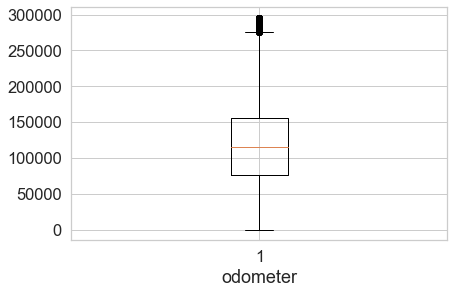

In [29]:
plt.boxplot(used_car_df_trimed.odometer)
plt.xlabel('odometer')
plt.show()

[Text(0.5, 1.0, 'Frequency Distribution of Odometer')]

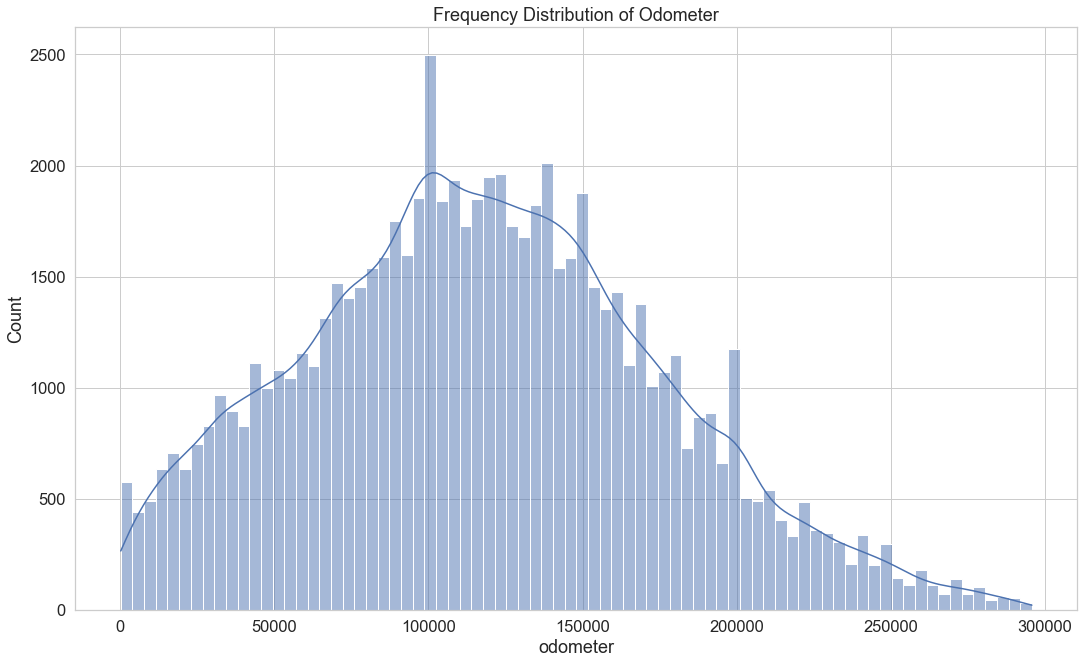

In [30]:
# odometer hist
fig,ax = plt.subplots(figsize=(16,10))
sns.histplot(data=used_car_df_trimed, x="odometer", kde=True, ax=ax)
ax.set(title='Frequency Distribution of Odometer')

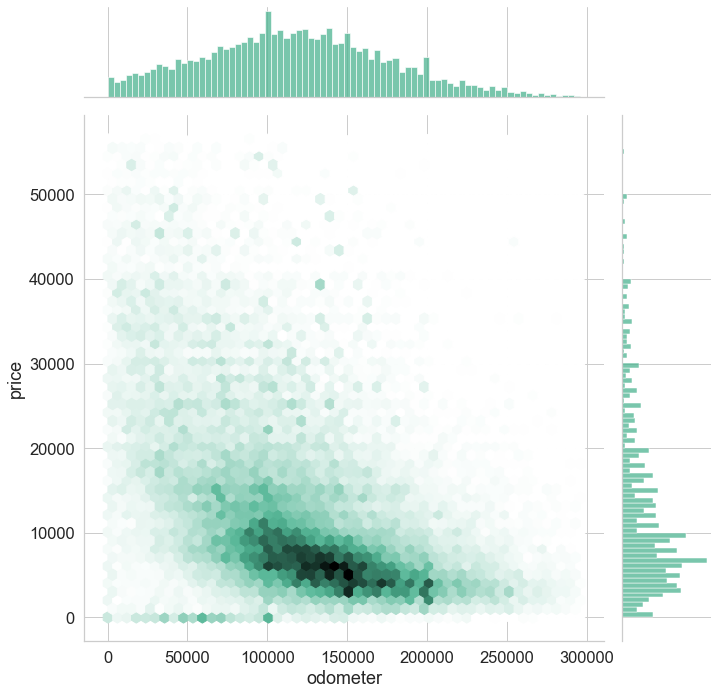

In [31]:
sns.jointplot(x=used_car_df_trimed['odometer'], y=used_car_df_trimed['price'], height=10, kind="hex", color="#4CB391")

## Condition

In [32]:
used_car_df_trimed.condition.value_counts()

excellent    36758
good         24453
like new      9777
fair          2907
new            356
salvage        225
Name: condition, dtype: int64

In [33]:
used_car_df_trimed.condition.unique()

array(['excellent', 'good', 'new', 'fair', 'like new', 'salvage'],
      dtype=object)

In [34]:
grouped_by_condition_df = used_car_df_trimed.groupby(['condition'])
grouped_by_condition_df.price.describe()

count          mean           std  min     25%      50%      75%  \
condition                                                                       
excellent  36758.0  14202.414903  10603.938666  1.0  6600.0  10995.0  18900.0   
fair        2907.0   3798.018232   3651.584091  1.0  1550.0   2800.0   4700.0   
good       24453.0  10782.673578   9567.596169  1.0  4400.0   7490.0  13900.0   
like new    9777.0  17956.718728  12579.254665  1.0  7995.0  14900.0  25750.0   
new          356.0  18389.994382  15387.959027  1.0  5995.0  13997.0  29050.0   
salvage      225.0   4045.231111   4590.818723  1.0  1000.0   2000.0   5900.0   

               max  
condition           
excellent  56000.0  
fair       55000.0  
good       56000.0  
like new   56499.0  
new        55000.0  
salvage    25000.0

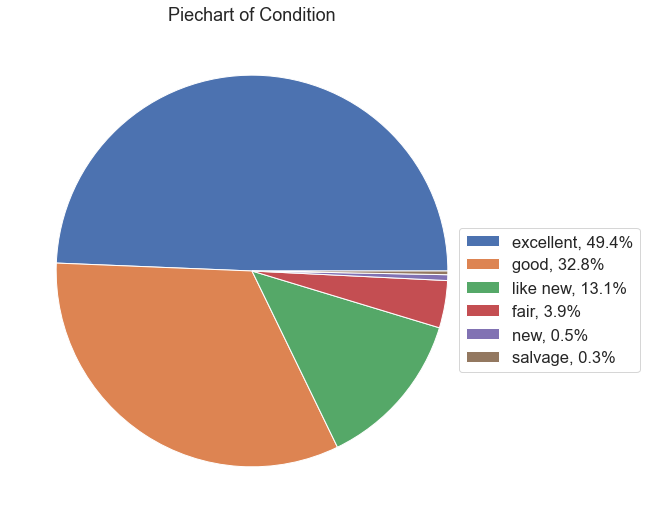

In [35]:
draw_pie_plot(used_car_df_trimed, 'condition', title='Piechart of Condition')

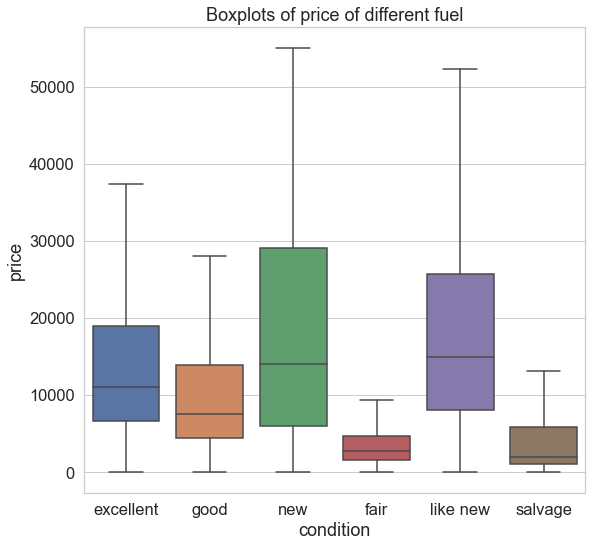

In [36]:
draw_multiple_price_boxplots(used_car_df_trimed, 'condition', 
                             'Boxplots of price of different fuel', 'fuel')

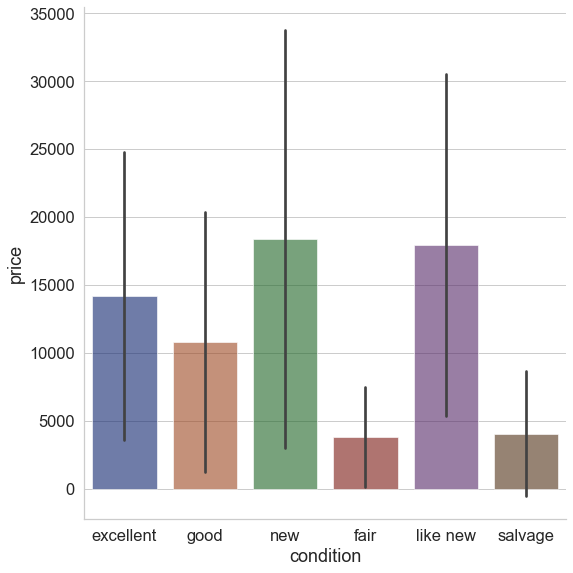

In [37]:
sns.catplot(
    data=used_car_df_trimed, kind="bar",
    x="condition", y="price", ax=ax,
    ci="sd", palette="dark", alpha=.6, height=8
)

## manufacturer

In [38]:
used_car_df_trimed.manufacturer.unique()

array(['ford', 'honda', 'dodge', 'chrysler', 'toyota', 'jeep', 'lexus',
       'chevrolet', 'bmw', 'gmc', 'mercedes-benz', 'mazda', 'rover',
       'ram', 'nissan', 'audi', 'mitsubishi', 'infiniti', 'volkswagen',
       'kia', 'hyundai', 'fiat', 'acura', 'cadillac', 'lincoln', 'jaguar',
       'saturn', 'volvo', 'alfa-romeo', 'buick', 'subaru', 'mini',
       'pontiac', 'harley-davidson', 'porsche', 'tesla', 'mercury',
       'datsun', 'land rover', 'aston-martin', 'ferrari'], dtype=object)

In [39]:
used_car_df_trimed.manufacturer.value_counts()

ford               14383
chevrolet          11170
toyota              6549
honda               4657
nissan              3809
jeep                3064
gmc                 2899
ram                 2658
dodge               2357
bmw                 2101
subaru              1901
mercedes-benz       1813
volkswagen          1717
hyundai             1667
kia                 1315
chrysler            1309
lexus               1198
cadillac            1151
buick               1000
mazda                940
audi                 867
pontiac              700
acura                669
lincoln              630
infiniti             615
mitsubishi           596
volvo                579
mini                 411
mercury              390
rover                355
saturn               341
porsche              221
jaguar               208
fiat                 125
harley-davidson       31
alfa-romeo            28
tesla                 25
datsun                14
land rover             8
aston-martin           3


In [40]:
grouped_by_manu_df = used_car_df_trimed.groupby(['manufacturer'])
grouped_by_manu_df.price.describe()

count          mean           std      min       25%  \
manufacturer                                                              
acura              669.0   9385.112108   7204.492183      1.0   4700.00   
alfa-romeo          28.0  21795.964286  12485.364651   2000.0   9375.00   
aston-martin         3.0  42631.666667   9555.182276  32900.0  37947.50   
audi               867.0  13087.080738   8960.137121      1.0   6500.00   
bmw               2101.0  12371.571157   9771.248331      1.0   5900.00   
buick             1000.0   9640.080000   8413.417134      1.0   3950.00   
cadillac          1151.0  11637.825369   9539.912961      1.0   4999.00   
chevrolet        11170.0  14983.314772  11483.029943      1.0   5999.00   
chrysler          1309.0   7657.862490   5736.425782      1.0   3695.00   
datsun              14.0  13434.928571   7516.606082   2500.0   8248.00   
dodge             2357.0  10207.248197   9148.096780      1.0   4200.00   
ferrari              2.0  21500.500000  30404.884484      1.0  10750.75   
fiat               125.0   9099.544000   5357.066749      1.0   5500.00   
ford             14383.0  16129.381701  12363.794811      1.0   6500.00   
gmc               2899.0  18741.705761  13102.827331      1.0   8495.00   
harley-davidson     31.0  13801.612903   5332.392213   3000.0  11975.00   
honda             4657.0   8878.240713   6413.336155      1.0   4500.00   
hyundai           1667.0   8250.660468   5090.428855      1.0   4500.00   
infiniti           615.0  12112.582114   8990.761344      1.0   5800.00   
jaguar             208.0  11555.153846   9578.759443      1.0   5298.75   
jeep              3064.0  13772.554830  10399.795310      1.0   5500.00   
kia               1315.0   8650.286692   5685.056397     30.0   4900.00   
land rover           8.0  18116.875000  20783.590013   3950.0   6371.25   
lexus             1198.0  13183.651920   9573.382715      1.0   6861.25   
lincoln            630.0   9713.228571   7182.786736      1.0   4800.00   
mazda              940.0   8399.646809   5790.062169      1.0   4500.00   
mercedes-benz     1813.0  13116.517375  10631.268623      1.0   5850.00   
mercury            390.0   5601.289744   4978.931002      1.0   2756.25   
mini               411.0   9292.732360   5223.749597      1.0   5950.00   
mitsubishi         596.0  13272.395973  11462.055735      1.0   4150.00   
nissan            3809.0   9676.215280   6932.500816      1.0   4990.00   
pontiac            700.0   8142.174286   8275.697440      1.0   3500.00   
porsche            221.0  21236.963801  12373.857633      1.0  12000.00   
ram               2658.0  22670.181716  13884.901137      1.0  11000.00   
rover              355.0  18255.811268  13373.402910      1.0   8000.00   
saturn             341.0   4536.299120   2863.110247    300.0   2995.00   
subaru            1901.0  10301.986323   6855.840268      1.0   5499.00   
tesla               25.0  34804.400000  15983.478248      1.0  28500.00   
toyota            6549.0  12214.268133   9962.557170      1.0   5460.00   
volkswagen        1717.0   9278.158998   6120.498103      1.0   5000.00   
volvo              579.0   8188.341969   7972.708722      1.0   3550.00   

                     50%       75%      max  
manufacturer                                 
acura             7395.0  11999.00  46567.0  
alfa-romeo       26800.0  28887.50  54998.0  
aston-martin     42995.0  47497.50  52000.0  
audi             10999.0  16995.00  48000.0  
bmw               9998.0  16350.00  55000.0  
buick             6999.0  12995.00  50000.0  
cadillac          9991.0  15000.00  53995.0  
chevrolet        11750.0  21700.00  56000.0  
chrysler          6250.0   9990.00  51500.0  
datsun           15000.0  18800.00  26500.0  
dodge             7500.0  12995.00  55900.0  
ferrari          21500.5  32250.25  43000.0  
fiat              7500.0  10950.00  32500.0  
ford             12500.0  23495.00  56499.0  
gmc              15000.0  27500.00  55680.0  
harley-davi

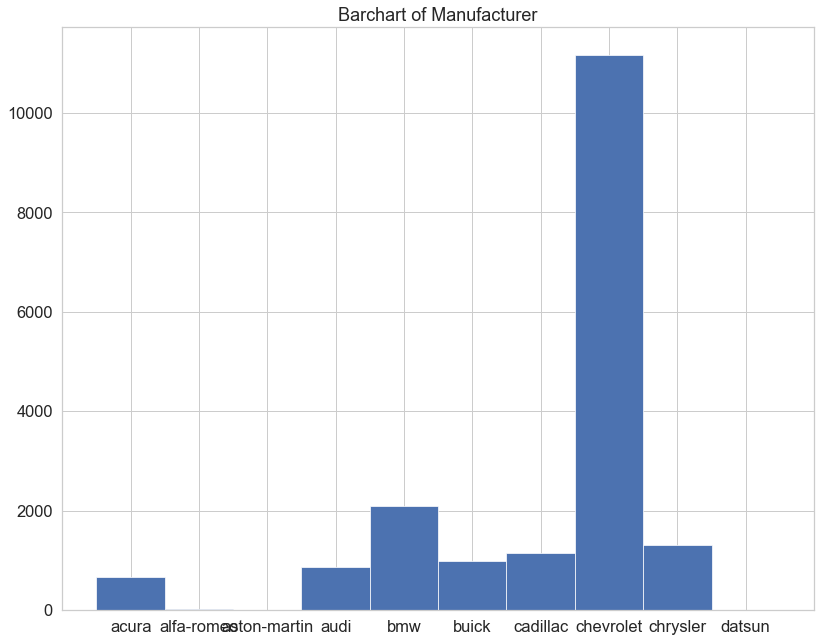

In [41]:
draw_head_bar_plot(used_car_df_trimed, 'manufacturer', title = 'Barchart of Manufacturer')

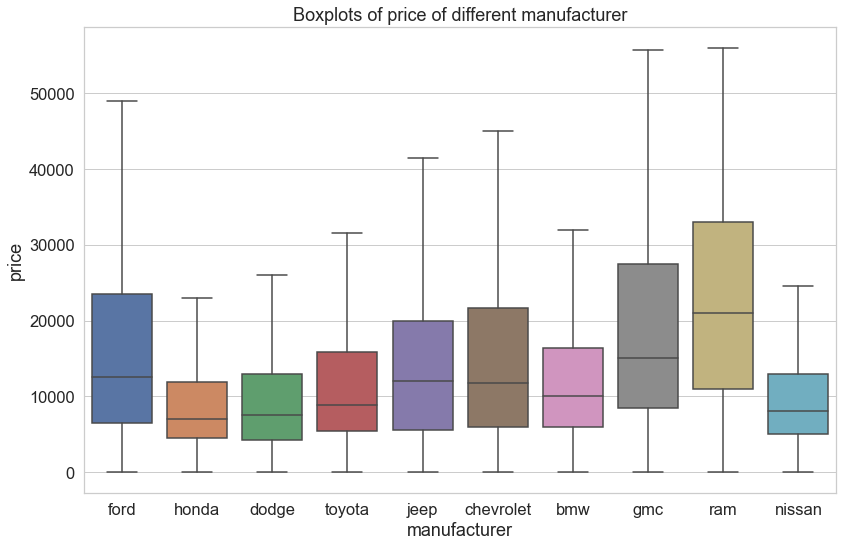

In [42]:
top_10_manufacturer = used_car_df_trimed.manufacturer.value_counts().head(10).index.tolist()
draw_multiple_price_boxplots(used_car_df_trimed, 'manufacturer', 
                             'Boxplots of price of different manufacturer',
                             'manufacturer',filter_labels=top_10_manufacturer)

## Fuel

In [43]:
used_car_df_trimed.fuel.unique()

array(['gas', 'diesel', 'hybrid', 'electric', 'other'], dtype=object)

In [44]:
used_car_df_trimed.fuel.value_counts()

gas         68714
diesel       4633
hybrid        920
electric      117
other          92
Name: fuel, dtype: int64

In [45]:
grouped_by_fuel_df = used_car_df_trimed.groupby(['fuel'])
grouped_by_fuel_df.price.describe()

count          mean           std     min      25%      50%  \
fuel                                                                      
diesel     4633.0  27146.822577  14315.667955     1.0  15000.0  26990.0   
electric    117.0  18387.470085  14846.362473  1100.0   7200.0  12999.0   
gas       68714.0  12243.165323   9891.205969     1.0   5000.0   8997.0   
hybrid      920.0  10334.448913   7614.810203     1.0   5700.0   7998.5   
other        92.0  11681.076087   8501.509141     5.0   4937.5   9900.0   

               75%      max  
fuel                         
diesel    38900.00  56499.0  
electric  23500.00  54750.0  
gas       16500.00  56000.0  
hybrid    12499.00  49900.0  
other     15923.75  45000.0

In [46]:
used_car_df_trimed.fuel.value_counts().index

Index(['gas', 'diesel', 'hybrid', 'electric', 'other'], dtype='object')

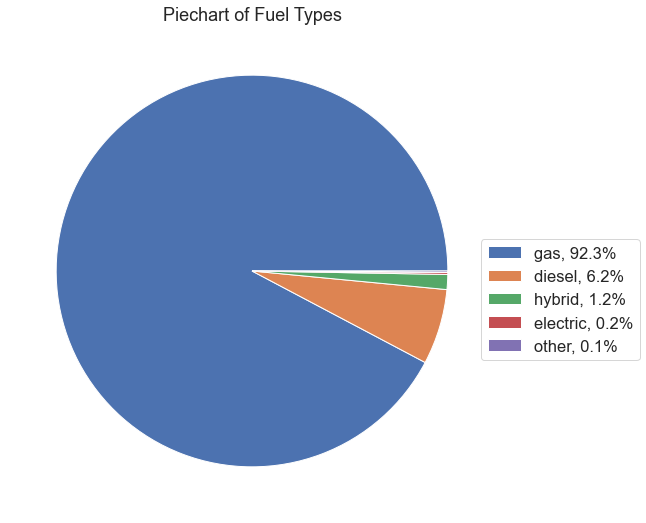

In [47]:
draw_pie_plot(used_car_df_trimed,'fuel', "Piechart of Fuel Types")

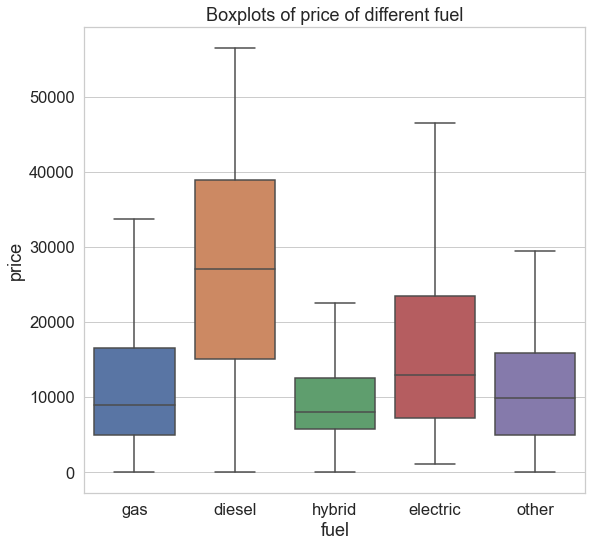

In [48]:
draw_multiple_price_boxplots(used_car_df_trimed, 'fuel', 
                             'Boxplots of price of different fuel', 'fuel')

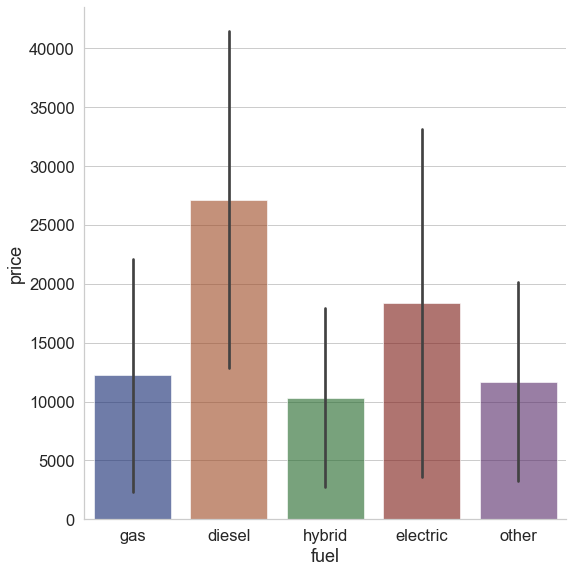

In [49]:
sns.catplot(
    data=used_car_df_trimed, kind="bar",
    x="fuel", y="price", ax=ax,
    ci="sd", palette="dark", alpha=.6, height=8
)

## Drive

In [50]:
used_car_df_trimed.drive.unique()

array(['rwd', '4wd', 'fwd'], dtype=object)

In [51]:
used_car_df_trimed.drive.value_counts()

4wd    30985
fwd    27000
rwd    16491
Name: drive, dtype: int64

In [52]:
grouped_by_drive_df = used_car_df_trimed.groupby(['drive'])
grouped_by_drive_df.price.describe()

count          mean           std  min     25%      50%      75%  \
drive                                                                       
4wd    30985.0  16785.611522  12418.355071  1.0  7000.0  13900.0  23995.0   
fwd    27000.0   8184.754296   5911.396897  1.0  4200.0   6888.0  10495.0   
rwd    16491.0  14474.030562  10752.132758  1.0  6000.0  11500.0  20825.0   

           max  
drive           
4wd    56499.0  
fwd    56000.0  
rwd    55995.0

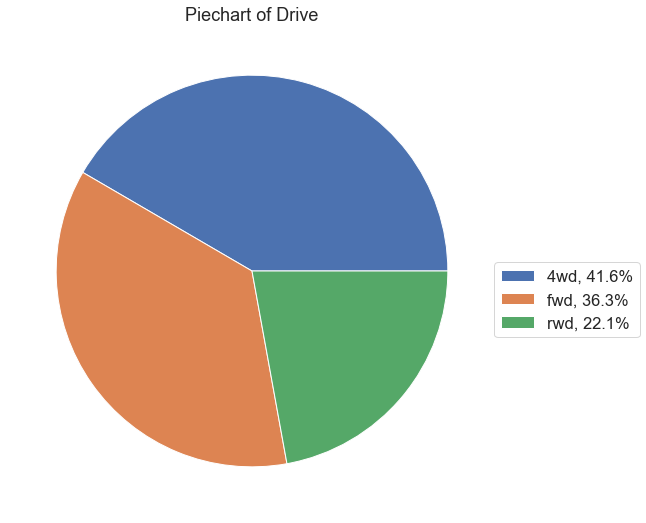

In [53]:
draw_pie_plot(used_car_df_trimed, 'drive', "Piechart of Drive")

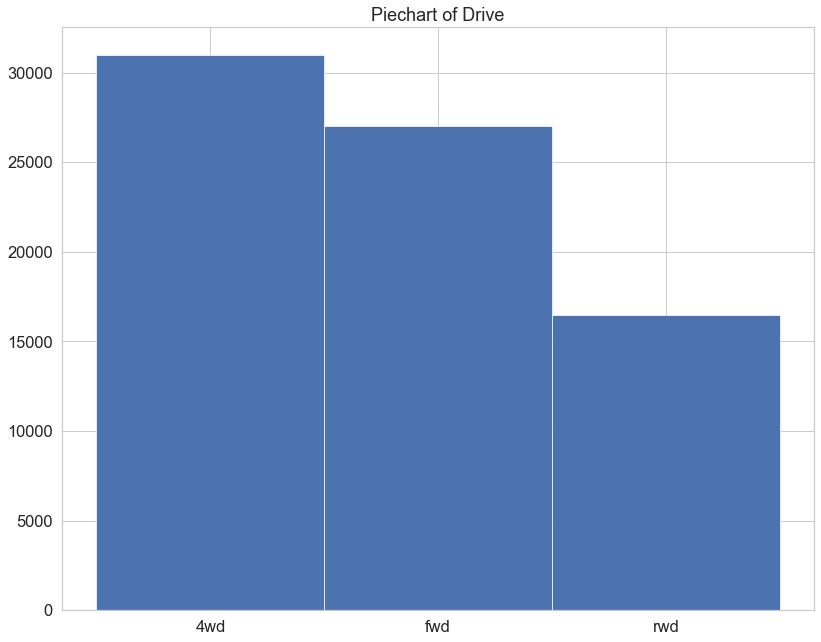

In [54]:
draw_bar_plot(used_car_df_trimed, 'drive', "Piechart of Drive")

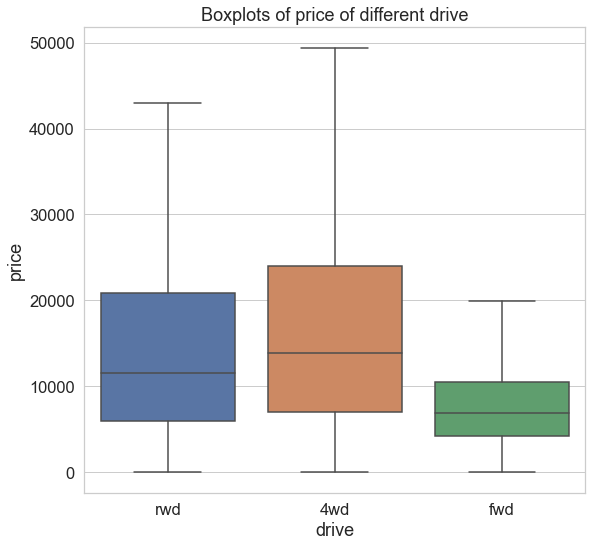

In [55]:
draw_multiple_price_boxplots(used_car_df_trimed, 'drive', 
                             'Boxplots of price of different drive', 'drive')

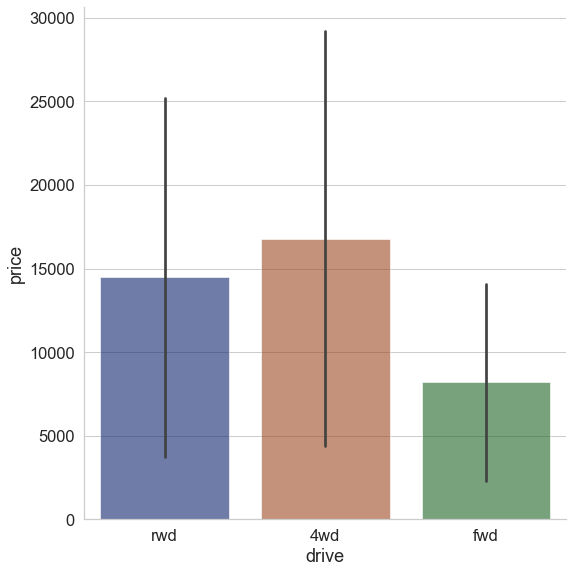

In [56]:
sns.catplot(
    data=used_car_df_trimed, kind="bar",
    x="drive", y="price", ax=ax,
    ci="sd", palette="dark", alpha=.6, height=8
)

## paint_color

In [57]:
used_car_df_trimed.paint_color.unique()

array(['black', 'blue', 'silver', 'white', 'grey', 'yellow', 'red',
       'green', 'brown', 'purple', 'custom', 'orange'], dtype=object)

In [58]:
used_car_df_trimed.paint_color.value_counts()

white     17963
black     13015
silver    10901
grey       8993
blue       7978
red        7507
green      2546
brown      2370
custom     1932
yellow      602
orange      423
purple      246
Name: paint_color, dtype: int64

In [59]:
grouped_by_color_df = used_car_df_trimed.groupby(['paint_color'])
grouped_by_color_df.price.describe()

count          mean           std    min     25%      50%  \
paint_color                                                                
black        13015.0  14352.902497  11278.745947    1.0  6200.0  10995.0   
blue          7978.0  11125.945976   9245.276472    1.0  4900.0   7995.0   
brown         2370.0  10074.659494   8849.902685    1.0  4062.5   7490.0   
custom        1932.0  12265.525880  10355.845933    1.0  4999.0   8894.0   
green         2546.0   9446.562058   9063.892368    1.0  3500.0   6200.0   
grey          8993.0  12450.698543   9978.807525    1.0  5500.0   9300.0   
orange         423.0  14776.439716  10962.077589    1.0  5999.5  11995.0   
purple         246.0   9423.300813   9492.141901  200.0  3815.0   6000.0   
red           7507.0  12494.775410  10633.082820    1.0  4995.0   8995.0   
silver       10901.0  10948.618751   9228.395040    1.0  4900.0   7950.0   
white        17963.0  16202.734398  12136.043584    1.0  6850.0  12988.0   
yellow         602.0  13047.308970   9970.903523    1.0  5500.0   9997.5   

                  75%      max  
paint_color                     
black        19000.00  56000.0  
blue         14900.00  55000.0  
brown        12990.00  52995.0  
custom       15995.00  55000.0  
green        11950.00  55950.0  
grey         16000.00  56000.0  
orange       21000.00  55000.0  
purple       10999.75  55000.0  
red          16500.00  55500.0  
silver       13999.00  56000.0  
white        23900.00  56499.0  
yellow       18000.00  54500.0

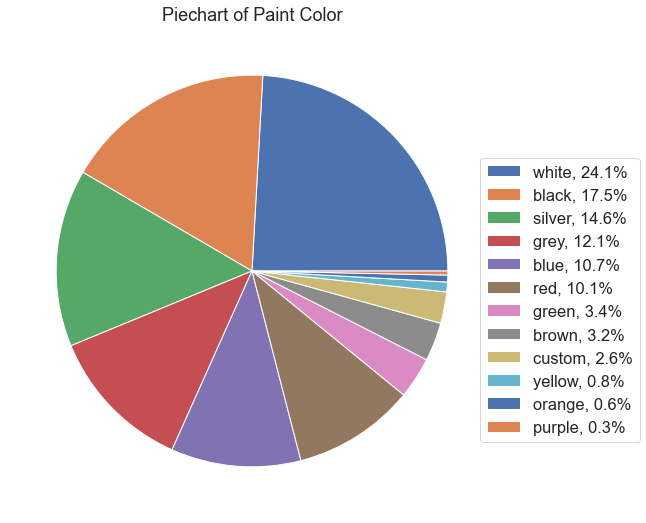

In [60]:
draw_pie_plot(used_car_df_trimed,'paint_color', "Piechart of Paint Color")

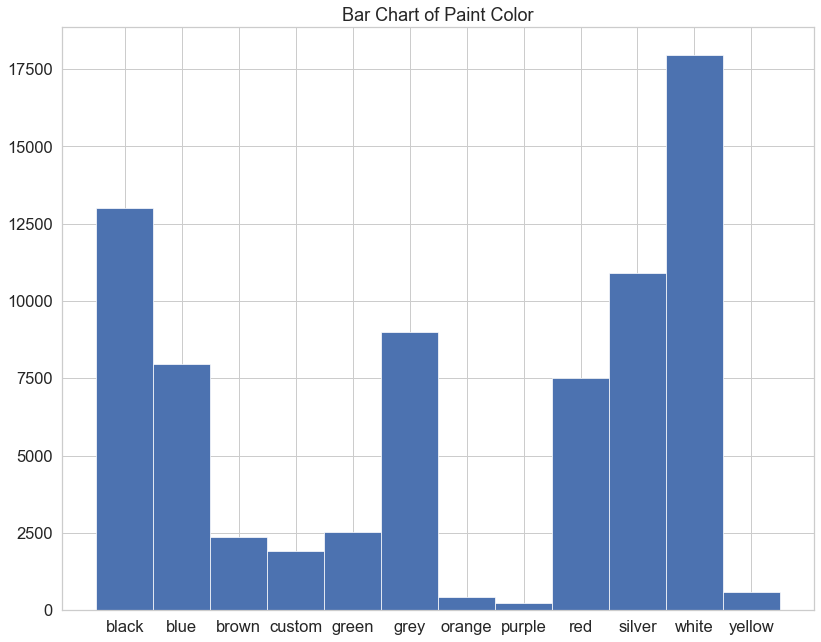

In [61]:
draw_bar_plot(used_car_df_trimed,'paint_color', "Bar Chart of Paint Color")

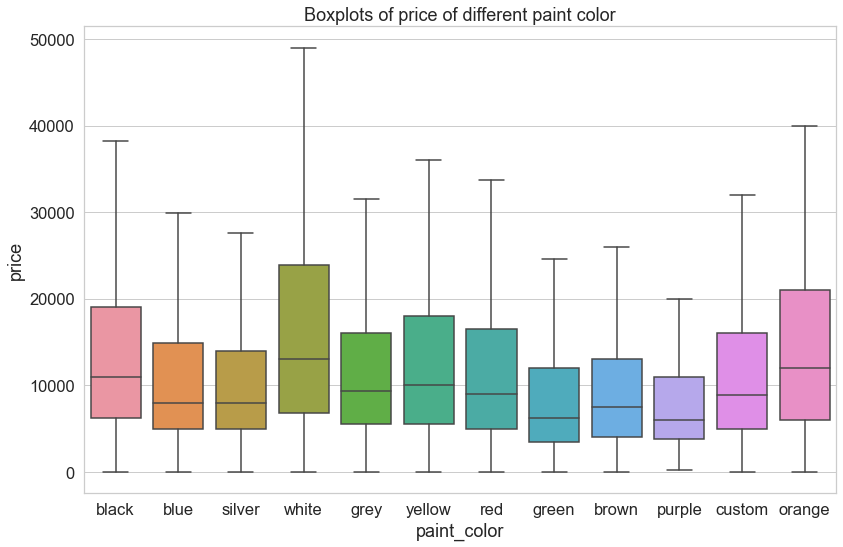

In [62]:
draw_multiple_price_boxplots(used_car_df_trimed, 'paint_color', 
                             'Boxplots of price of different paint color', 'paint_color')

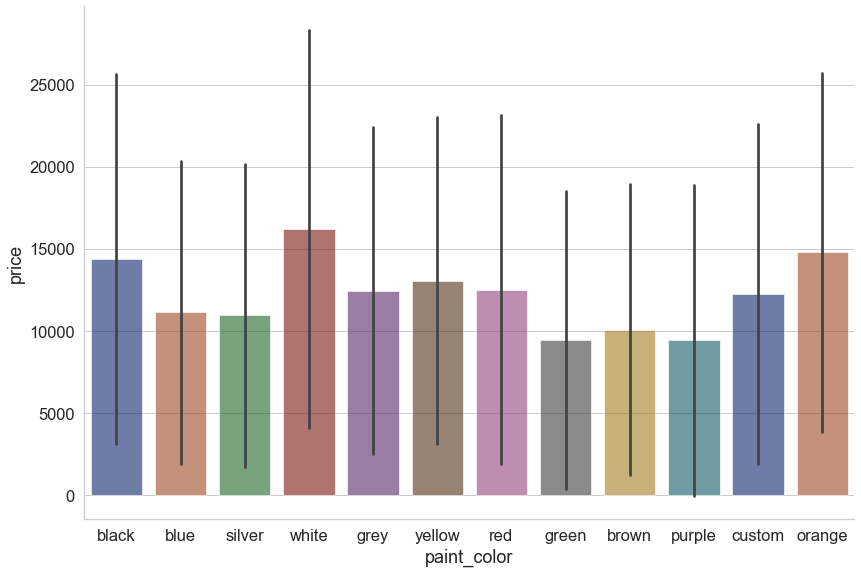

In [63]:
sns.catplot(
    data=used_car_df_trimed, kind="bar",
    x="paint_color", y="price", ax=ax,
    ci="sd", palette="dark", alpha=.6, height=8, aspect=1.5
)

## type

In [64]:
used_car_df_trimed.type.unique()

array(['truck', 'pickup', 'mini-van', 'sedan', 'offroad', 'SUV',
       'convertible', 'coupe', 'hatchback', 'wagon', 'other', 'van',
       'bus'], dtype=object)

In [65]:
used_car_df_trimed.type.value_counts()

sedan          20880
SUV            19061
truck          12182
pickup          6161
coupe           4082
hatchback       3041
van             2621
convertible     2134
mini-van        1794
wagon           1610
other            462
offroad          326
bus              122
Name: type, dtype: int64

In [66]:
grouped_by_type_df = used_car_df_trimed.groupby(['type'])
grouped_by_type_df.price.describe()

count          mean           std    min       25%      50%  \
type                                                                         
SUV          19061.0  12611.693353   9354.211886    1.0   5975.00   9998.0   
bus            122.0  12264.950820   8989.174139  175.0   4700.00  11500.0   
convertible   2134.0  13840.753046   9813.212157    1.0   6800.00  11000.0   
coupe         4082.0  12576.124449  10831.705343    1.0   4800.00   8990.0   
hatchback     3041.0   8256.286748   5636.887320    1.0   4500.00   6900.0   
mini-van      1794.0   8893.641026   7733.397366    1.0   3896.25   6200.0   
offroad        326.0  16297.392638  11216.922923   13.0   7500.00  13500.0   
other          462.0  10856.374459  10011.339976    1.0   3825.00   7997.5   
pickup        6161.0  17535.816751  12220.757982    1.0   7995.00  14994.0   
sedan        20880.0   8347.595307   6445.277854    1.0   4100.00   6950.0   
truck        12182.0  22077.240108  13383.732300    1.0  10950.00  20925.0   
van           2621.0  15982.635254  10370.203447    1.0   7495.00  13995.0   
wagon         1610.0   7738.832919   6616.183921    1.0   3400.00   6498.5   

                  75%      max  
type                            
SUV          16888.00  56000.0  
bus          18495.00  32500.0  
convertible  18500.00  55000.0  
coupe        17500.00  55995.0  
hatchback    10000.00  50000.0  
mini-van     11500.00  54000.0  
offroad      23388.00  54500.0  
other        14500.00  52500.0  
pickup       24995.00  56000.0  
sedan        10500.00  55900.0  
truck        31900.00  56499.0  
van          22487.00  55000.0  
wagon        10387.25  54000.0

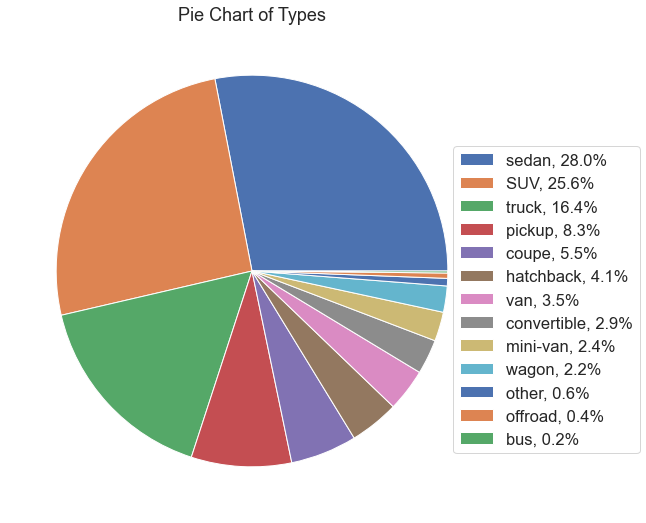

In [67]:
draw_pie_plot(used_car_df_trimed,'type', "Pie Chart of Types")

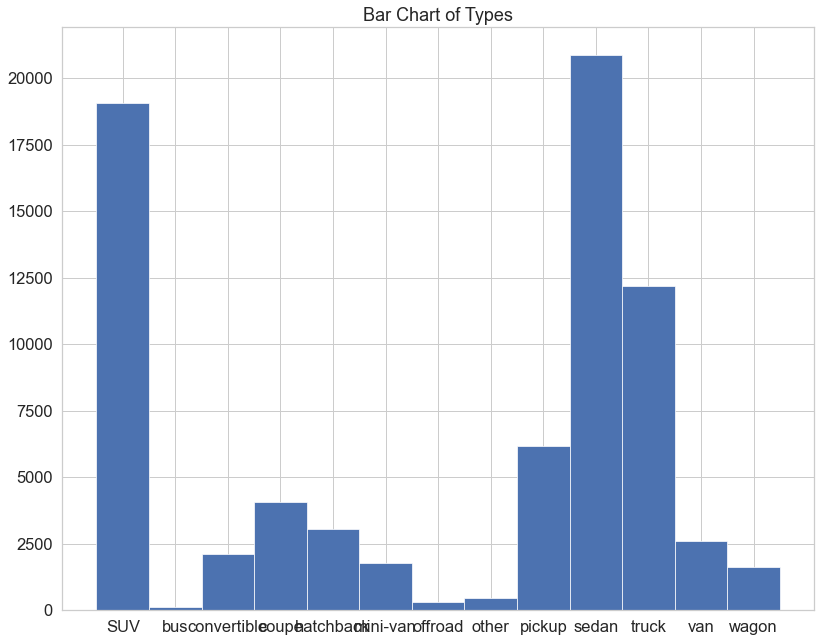

In [68]:
draw_bar_plot(used_car_df_trimed,'type', "Bar Chart of Types")

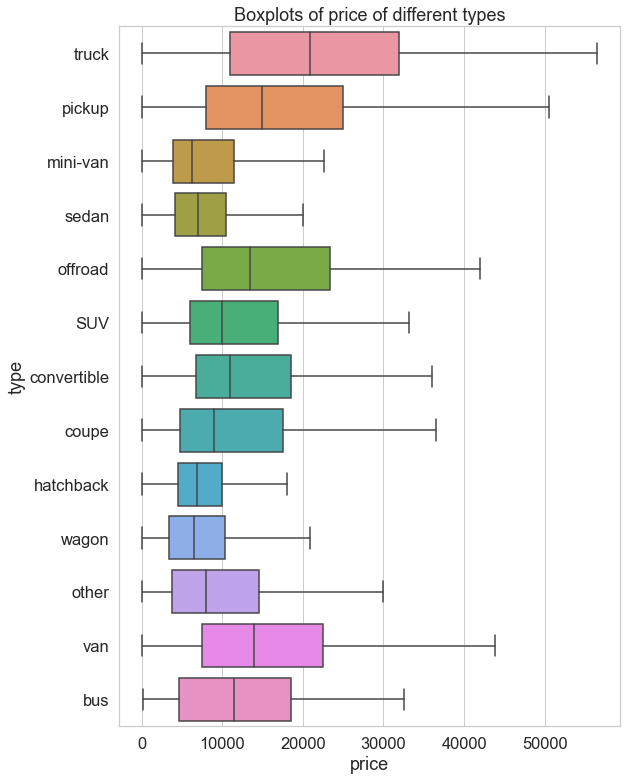

In [69]:
draw_multiple_price_boxplots(used_car_df_trimed, 'type', 
                             'Boxplots of price of different types', 'type', orient="h")

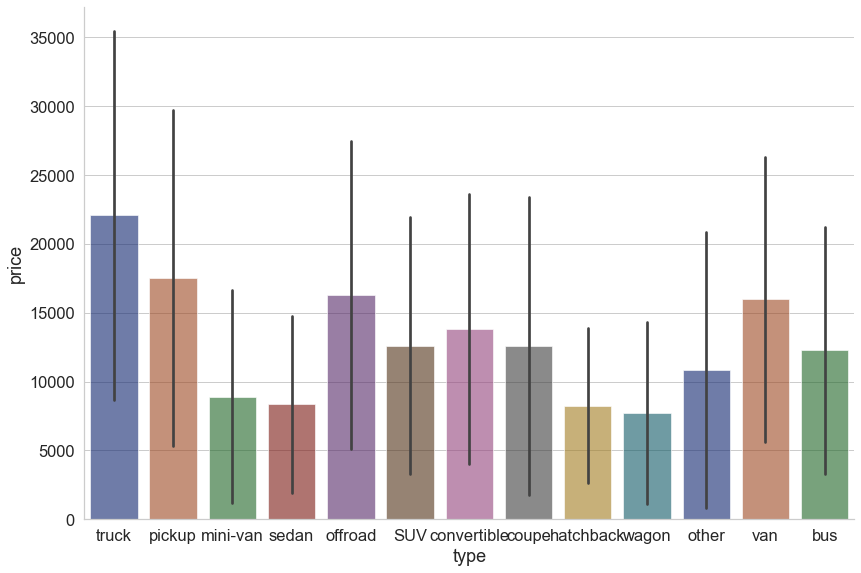

In [70]:
sns.catplot(
    data=used_car_df_trimed, kind="bar",
    x="type", y="price", ax=ax,
    ci="sd", palette="dark", alpha=.6, height=8, aspect=1.5
)

## transmission

In [71]:
used_car_df_trimed.transmission.unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [72]:
used_car_df_trimed.transmission.value_counts()

automatic    68046
manual        5561
other          869
Name: transmission, dtype: int64

In [73]:
grouped_by_transmission_df = used_car_df_trimed.groupby(['transmission'])
grouped_by_transmission_df.price.describe()

count          mean           std  min     25%     50%  \
transmission                                                             
automatic     68046.0  13367.647915  10880.182871  1.0  5500.0  9900.0   
manual         5561.0  11426.911707   9733.070516  1.0  4500.0  8000.0   
other           869.0   7619.966628  10950.993805  1.0     1.0   100.0   

                  75%      max  
transmission                    
automatic     17995.0  56499.0  
manual        15900.0  55500.0  
other         12500.0  50000.0

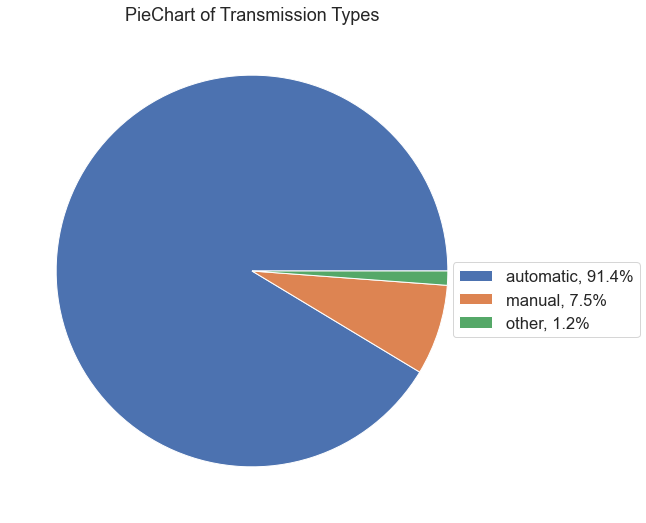

In [74]:
draw_pie_plot(used_car_df_trimed,'transmission', "PieChart of Transmission Types")

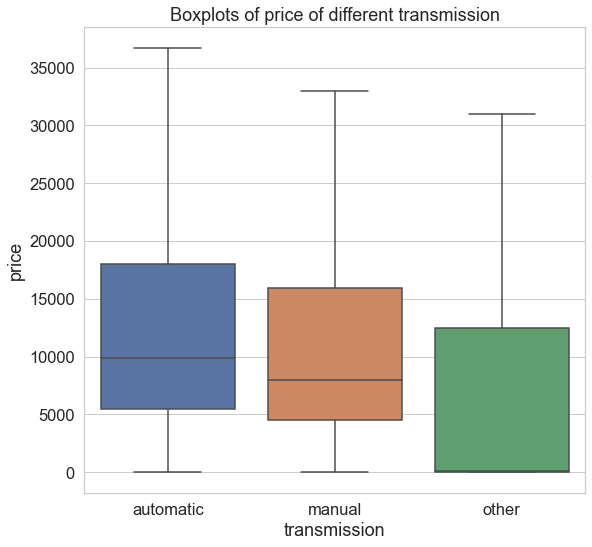

In [75]:
draw_multiple_price_boxplots(used_car_df_trimed, 'transmission', 
                             'Boxplots of price of different transmission', 'transmission')

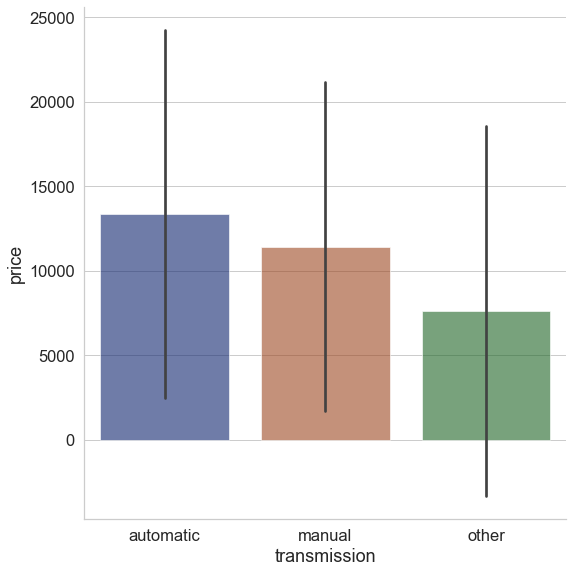

In [76]:
sns.catplot(
    data=used_car_df_trimed, kind="bar",
    x="transmission", y="price", ax=ax,
    ci="sd", palette="dark", alpha=.6, height=8
)

# Size

In [77]:
used_car_df_trimed['size'].unique()

array(['full-size', 'mid-size', 'compact', 'sub-compact'], dtype=object)

In [78]:
used_car_df_trimed['size'].value_counts()

full-size      41399
mid-size       22212
compact         9575
sub-compact     1290
Name: size, dtype: int64

In [79]:
grouped_by_size_df = used_car_df_trimed.groupby(['size'])
grouped_by_size_df.price.describe()

count          mean           std  min      25%      50%  \
size                                                                      
compact       9575.0   8684.537859   7133.975688  1.0  4000.00   6988.0   
full-size    41399.0  15620.299838  12020.057764  1.0  6495.00  11999.0   
mid-size     22212.0  10713.082433   8488.268715  1.0  4950.00   7999.0   
sub-compact   1290.0   9305.075194   7306.001295  1.0  4599.25   6999.0   

                 75%      max  
size                           
compact      11000.0  55995.0  
full-size    22000.0  56499.0  
mid-size     13995.0  56000.0  
sub-compact  11999.0  55000.0

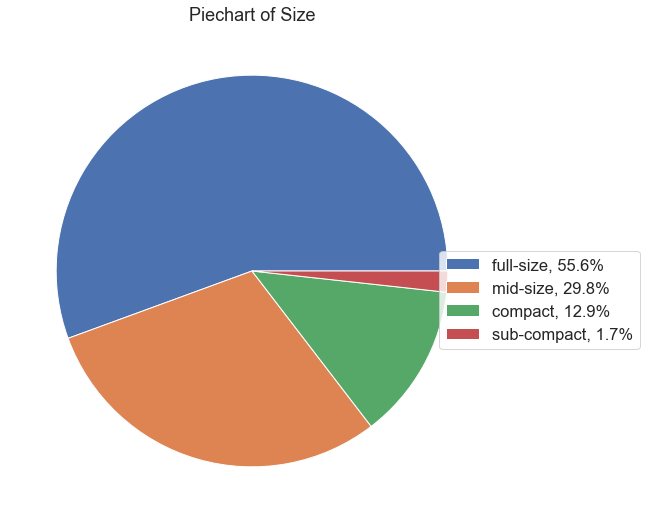

In [80]:
draw_pie_plot(used_car_df_trimed,'size', 'Piechart of Size')

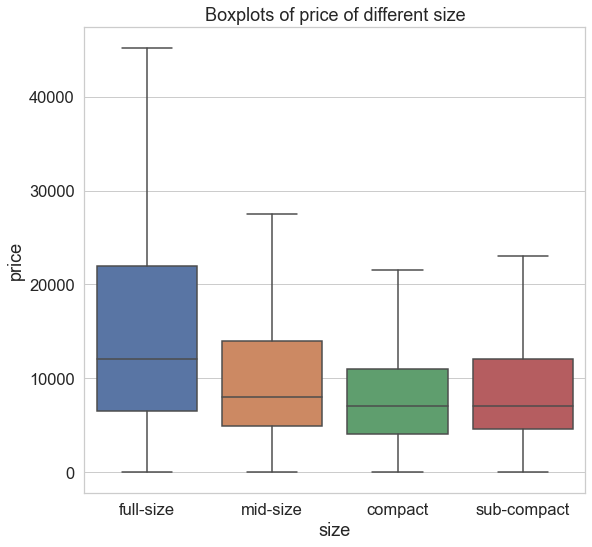

In [81]:
draw_multiple_price_boxplots(used_car_df_trimed, 'size', 'Boxplots of price of different size')

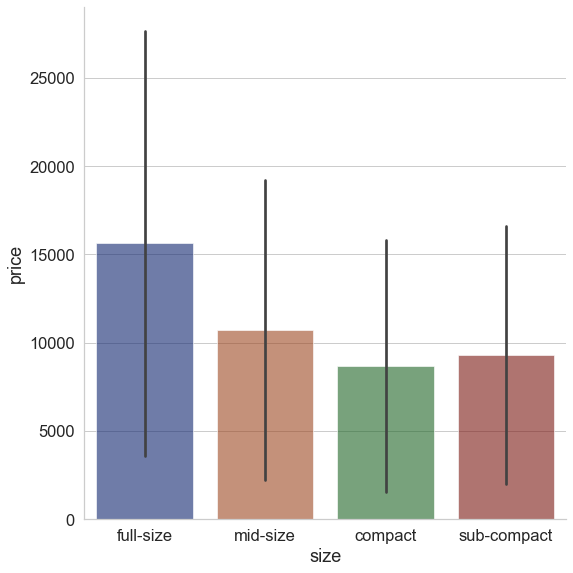

In [82]:
sns.catplot(
    data=used_car_df_trimed, kind="bar",
    x="size", y="price", ax=ax,
    ci="sd", palette="dark", alpha=.6, height=8
)

# Cylinders

In [83]:
used_car_df_trimed.cylinders.unique()

array(['6 cylinders', '8 cylinders', '4 cylinders', '5 cylinders',
       '10 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

In [84]:
used_car_df_trimed.cylinders.value_counts()

6 cylinders     25474
4 cylinders     24914
8 cylinders     22231
10 cylinders      757
5 cylinders       697
other             224
3 cylinders       138
12 cylinders       41
Name: cylinders, dtype: int64

In [85]:
grouped_by_cylinders_df = used_car_df_trimed.groupby(['cylinders'])
grouped_by_cylinders_df.price.describe()

count          mean           std     min      25%      50%  \
cylinders                                                                     
10 cylinders    757.0  15994.978864  15111.774061     1.0     1.00  11997.0   
12 cylinders     41.0  15947.634146  12236.549912     1.0  9300.00  11500.0   
3 cylinders     138.0   9828.985507   7740.449053     1.0  4923.75   8995.0   
4 cylinders   24914.0   9586.935016   6833.039030     1.0  4975.00   7976.0   
5 cylinders     697.0   7123.466284   5150.060638     1.0  3988.00   6000.0   
6 cylinders   25474.0  12638.406964  10697.934649     1.0  4988.00   8988.0   
8 cylinders   22231.0  17838.730107  12669.053547     1.0  7705.50  14975.0   
other           224.0  14847.241071  12483.084141  1000.0  5950.00  10000.0   

                   75%      max  
cylinders                        
10 cylinders  26990.00  55000.0  
12 cylinders  19900.00  52000.0  
3 cylinders   10998.50  34000.0  
4 cylinders   12873.25  55995.0  
5 cylinders    8500.00  42000.0  
6 cylinders   17495.00  56000.0  
8 cylinders   25990.00  56499.0  
other         20918.50  54750.0

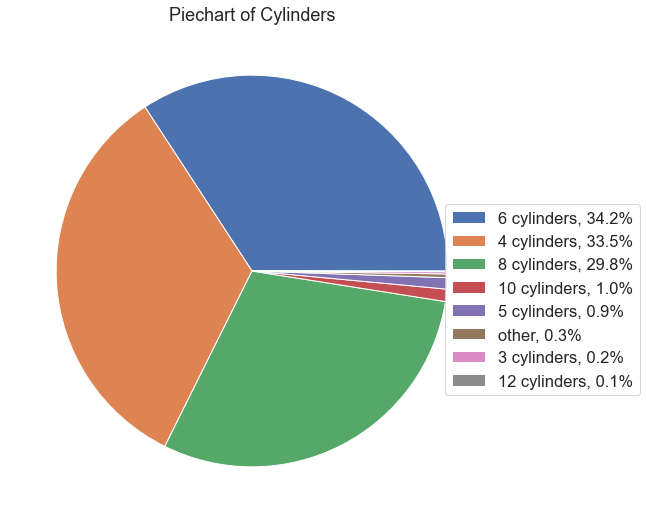

In [86]:
draw_pie_plot(used_car_df_trimed, 'cylinders', 'Piechart of Cylinders')

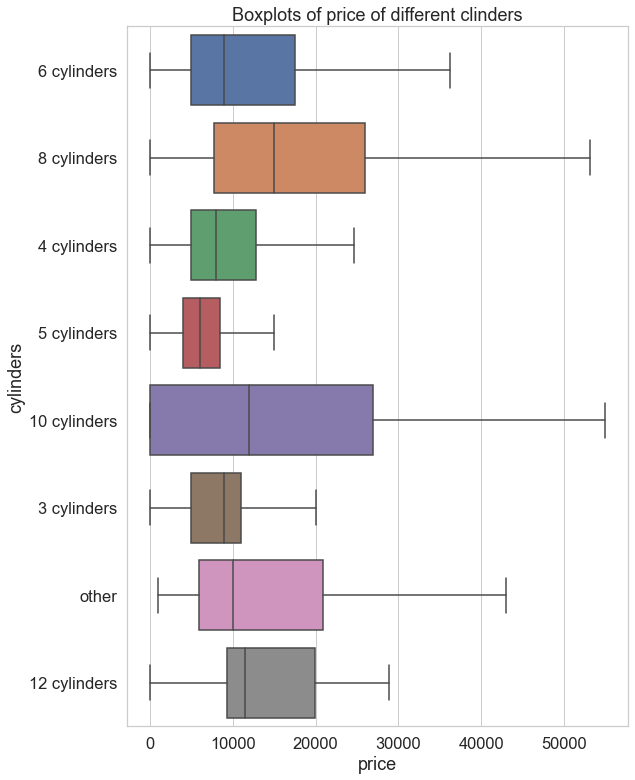

In [87]:
draw_multiple_price_boxplots(used_car_df_trimed, 'cylinders', 'Boxplots of price of different clinders', orient="h")

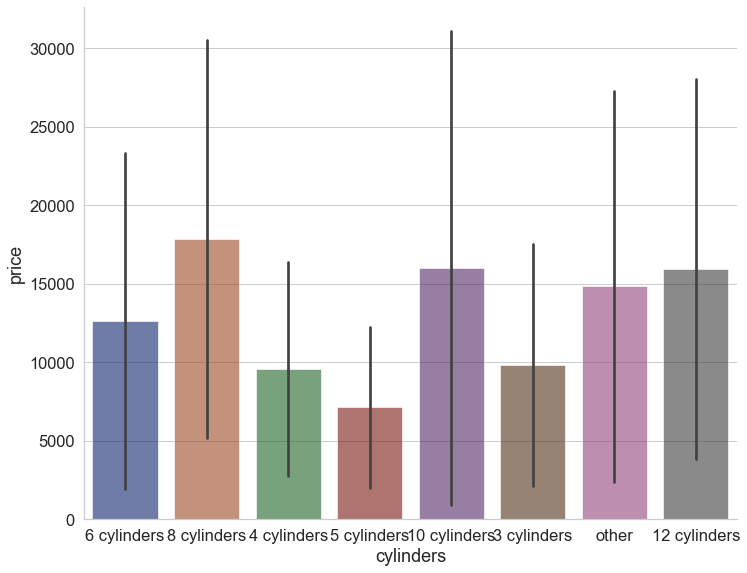

In [88]:
sns.catplot(
    data=used_car_df_trimed, kind="bar",
    x="cylinders", y="price", ax=ax,
    ci="sd", palette="dark", alpha=.6, height=8, aspect=1.3
)

## State　

In [89]:
# create grouped dataframe for plotly
groupby_state_df = used_car_df_trimed.groupby(['state'])

groupby_state_df_count = groupby_state_df.count()
groupby_state_df_count['count'] = groupby_state_df_count['price']
groupby_state_df_count = groupby_state_df_count.reset_index()

groupby_state_df_Mean = groupby_state_df.mean()
groupby_state_df_Mean = groupby_state_df_Mean.reset_index()
groupby_state_df_Mean = groupby_state_df_Mean.loc[:,['state', 'price']].merge(
    groupby_state_df_count.loc[:,['state', 'count']], left_on='state', right_on='state')

groupby_state_df_Mean['state'] = groupby_state_df_Mean['state'].str.upper()

In [90]:
# draw U.S. heat map
fig = px.choropleth(groupby_state_df_Mean, 
                    locations="state",  
                    color="count", 
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Frequency Distribution', 
    geo_scope='usa', 
)
fig.show() 

In [91]:
# draw U.S. heat map
fig = px.choropleth(groupby_state_df_Mean, 
                    locations="state",  
                    color="price", 
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average price of different state', 
    geo_scope='usa', 
)
fig.show() 

## Linear regression

In [92]:
# create dummies value
def categorical_2_ordered_dummies(df, field, orderList):
    df[field] = df[field].astype('category')
    df[field] = df[field].cat.reorder_categories(orderList, ordered=True)
    df[field] = df[field].cat.codes


    
## ordered
#  conditions
categorical_2_ordered_dummies(used_car_df_trimed, 'condition', 
                             ['salvage','fair','good','excellent', 'like new', 'new'])
# size
categorical_2_ordered_dummies(used_car_df_trimed, 'size', 
                             ['sub-compact', 'compact', 'mid-size', 'full-size'])





In [93]:
def categorical_one_hot_encoding(df, fields):
    prefixs = []
    for k in fields:
        prefixs.append(k + '_')
    return pd.get_dummies(df, columns=fields, prefix=prefixs)
    
# non-ordered
used_car_df_trimed = categorical_one_hot_encoding(used_car_df_trimed,
                             ['manufacturer','cylinders','fuel','transmission','drive','type','paint_color','state'])

In [94]:
# adjust year
used_car_df_trimed['year'] = 2022 - used_car_df_trimed['year']


In [109]:
# create train data and test data
y = used_car_df_trimed.iloc[:,0]
X = used_car_df_trimed.iloc[:,1:]
X = sm.add_constant(X)
# a simple linear model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=10)


# train statsmodel 
model = sm.OLS(y_train, X_train).fit()

# print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     860.9
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:23:59   Log-Likelihood:            -7.5512e+05
No. Observations:               73731   AIC:                         1.511e+06
Df Residuals:                   73598   BIC:                         1.512e+06
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [96]:
y_pred = model.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

45024232.60457944

In [98]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X_train)
# explainer process will take several minutes, please wait!
shap_values = explainer(X_test)

Permutation explainer: 746it [00:20, 21.03it/s]                         


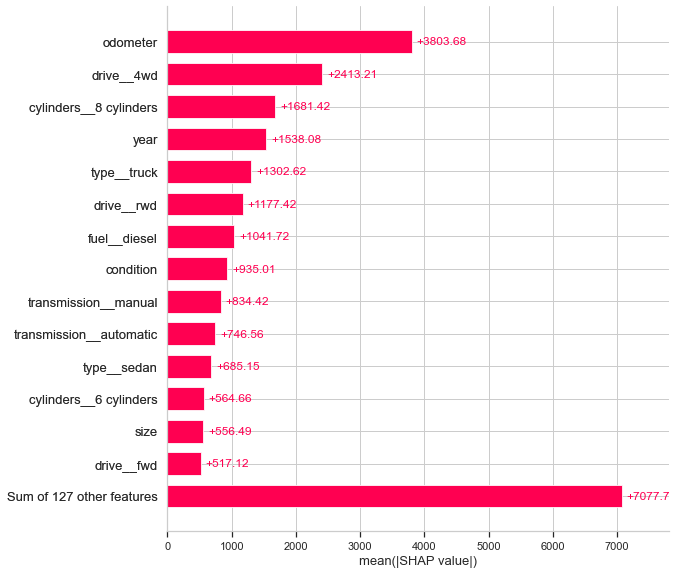

In [99]:
shap.plots.bar(shap_values, max_display = 15)

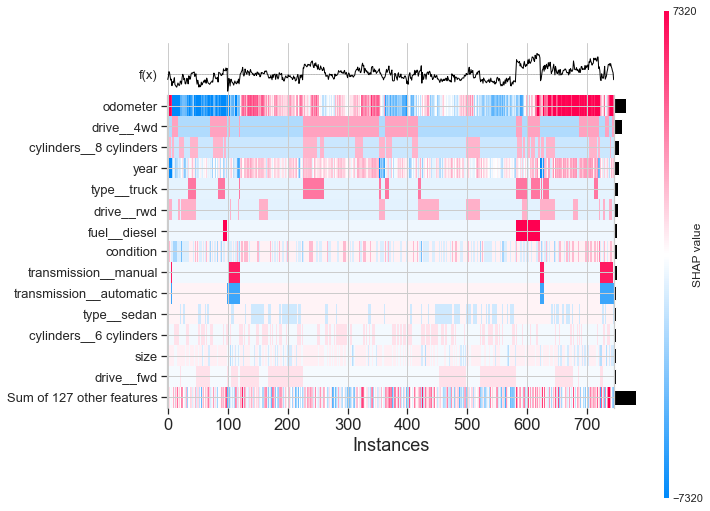

In [100]:
shap.plots.heatmap(shap_values, max_display = 15)

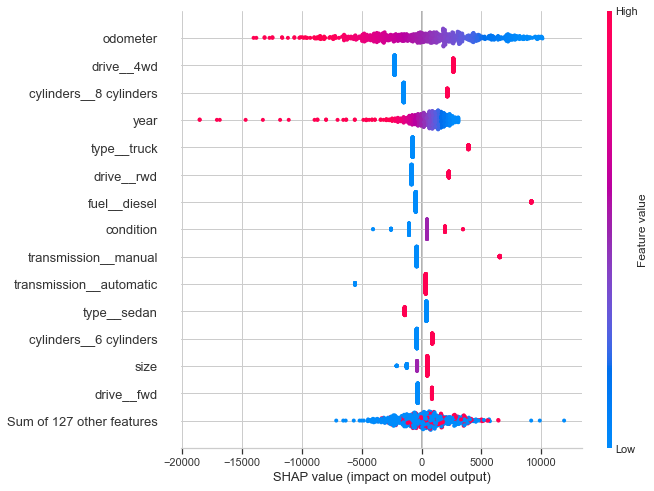

In [101]:
shap.plots.beeswarm(shap_values, max_display = 15)

In [102]:
# explain sample 1
shap.plots.force(shap_values[0])

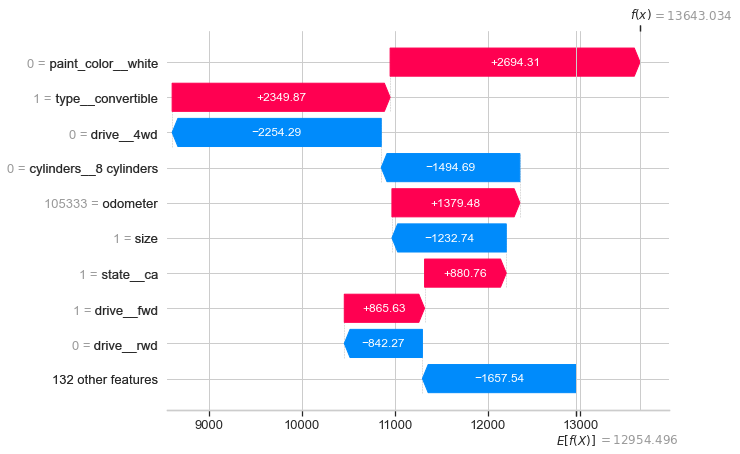

In [103]:
shap.plots.waterfall(shap_values[0])

In [104]:
used_car_df[used_car_df.index==y_test.index[0]]

price    year manufacturer  condition    cylinders fuel  odometer  \
35697   6350  2005.0         audi  excellent  4 cylinders  gas  105333.0   

      transmission drive     size         type paint_color state  
35697    automatic   fwd  compact  convertible      silver    ca

In [105]:
# explain sample 2
shap.plots.force(shap_values[110])

In [106]:
used_car_df[used_car_df.index==y_test.index[110]]

price    year manufacturer condition    cylinders fuel  odometer  \
291226   6995  2011.0    chevrolet      good  8 cylinders  gas  229183.0   

       transmission drive      size type paint_color state  
291226    automatic   rwd  mid-size  van       white    oh

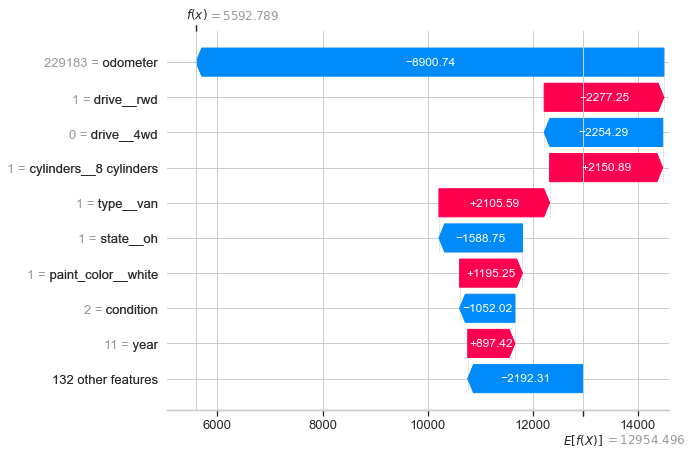

In [107]:
shap.plots.waterfall(shap_values[110])